<a href="https://colab.research.google.com/github/akshaymathur777/TCD-Computer-Vision-Course/blob/master/CV_Assignment_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CS7GV1 - Computer Vision Assignment (A)***

Submitted By - Akshay Mathur (19301666)

**Part 1 - Histograms**

Importing all the libraries used in the assignment

In [0]:
%tensorflow_version 1.x
import numpy as np
import cv2
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.decomposition import PCA
from keras.datasets import mnist
import scipy.spatial.distance as SSD
import seaborn as sns

a. Reading a RGB colour image and displaying it

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  361k  100  361k    0     0  1019k      0 --:--:-- --:--:-- --:--:-- 1019k


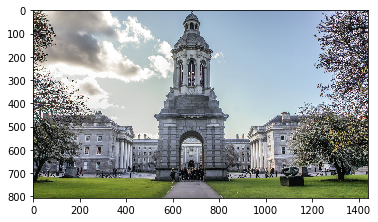

In [203]:
# Fetching the image from the URL
!curl -o image.jpg https://img.theculturetrip.com/1440x807/smart/wp-content/uploads/2016/08/6995209237_5244628609_k.jpg

# Reading the image and plotting it
img = mpimg.imread('image.jpg')
plt.imshow(img)
plt.show()

b. Converting the RGB image into LAB color scheme and displaying each component as a grey level image

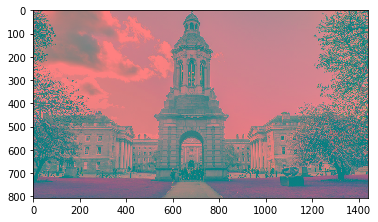

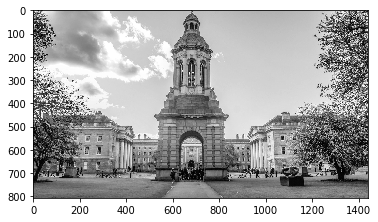

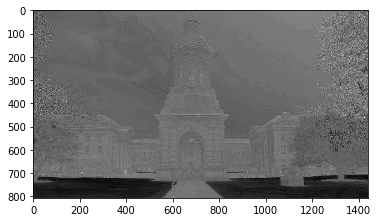

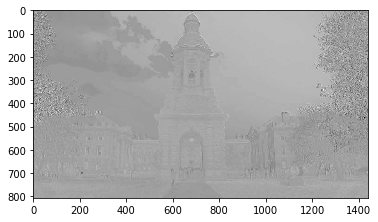

In [204]:
# Using the OpenCV library to convert the image into LAB color scheme
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Plotting the image in LAB color scheme
plt.imshow(lab)
plt.show()

# Splitting the image into the L, A and B components
L, A ,B = cv2.split(lab)

# Ploting the L, A and B components
plt.imshow(L, cmap = 'gray')
plt.show()
plt.imshow(A, cmap = 'gray')
plt.show()
plt.imshow(B, cmap = 'gray')
plt.show()

c. Computing the Spatial Derivatives of the Luminance component L in the horizontal and vertical direction

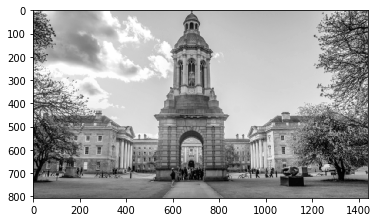

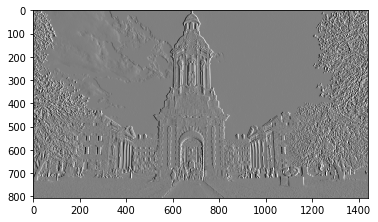

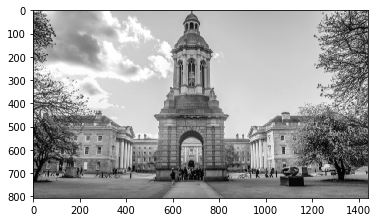

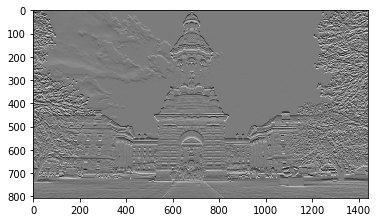

In [205]:
# Gaussian Blur Filter in the X direction to reduce noise
gaus_x = cv2.GaussianBlur(L, (5,5), sigmaX = 100)
plt.imshow(gaus_x, cmap = 'gray')
plt.show()

# Derivatives in the X direction
sobelx = cv2.Sobel(gaus_x, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx, cmap = 'gray')
plt.show()

# Guassian Blur Filter in the Y direction to reduce noise
gaus_y = cv2.GaussianBlur(L, (5,5), sigmaX = 0, sigmaY = 100)
plt.imshow(gaus_y, cmap = 'gray')
plt.show()

# Derivatives in the Y direction
sobely = cv2.Sobel(gaus_y, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobely, cmap = 'gray')
plt.show()

d. Computing a 2D histogram with the chrominance component (a, b) and displaying the histogram asa grey image(heat map)

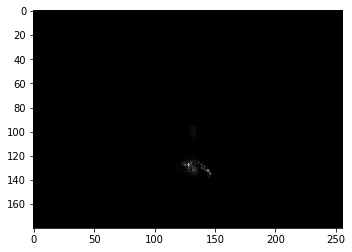

In [206]:
# Using the OpenCv command for calculating the Histogram
hist = cv2.calcHist([lab], [1, 2], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist, interpolation = 'nearest', cmap = 'gray')
plt.show()

e. Using a part of the image to compute a 2D histogram model with the chrominance component (a, b), compute a back projection map wuth the model histogram in the target image

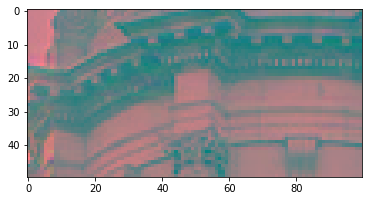

In [207]:
# Selecting a region of interest (ROI) to be back projected
roi = img[150:200, 600:700]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2LAB)
plt.imshow(roi)
plt.show()

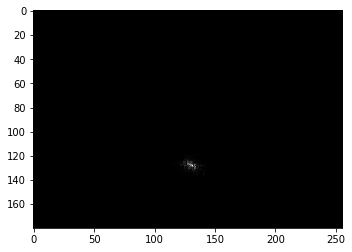

In [208]:
# Computing and plotting the 2D histogram of the chrominance components of 
# the Region of Interest
roi_hist = cv2.calcHist([roi], [1, 2], None, [180, 256], [0, 180, 0, 256])
plt.imshow(roi_hist, interpolation = 'nearest', cmap = 'gray')
plt.show()

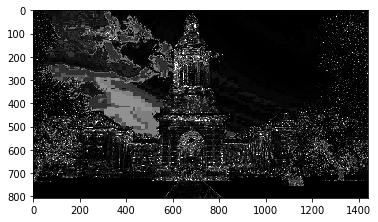

In [209]:
# Computing the Back Projection of the ROI on the Image
mask = cv2.calcBackProject([lab], [1, 2], roi_hist, [0, 180, 0, 256], 1)
plt.imshow(mask, cmap = 'gray')
plt.show()

f. Perform histogram equalization using 1D histogram using the luminnace

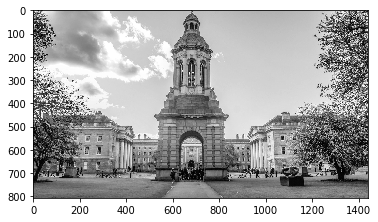

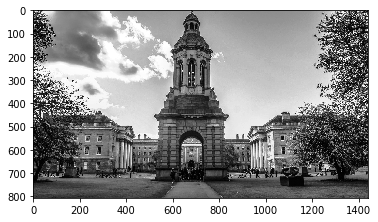

In [210]:
# Performing Histogram Equalization
equ = cv2.equalizeHist(L)

# Image before Histogram Equalization
plt.imshow(L, cmap = 'gray')
plt.show()

# Image after Histogram Equalization
plt.imshow(equ, cmap = 'gray')
plt.show()

g. Evaluate the performance of these techniques with histograms




These techniques help us to identify and extract useful and important features of images in order to use the images for computer vision tasks.


*   Using the LAB colour scheme for image processing is beneficial as it includes all colours in the spectrum along with being the most exact method of representing colour. It is also device-independent.

*   A Gaussian filter helps us to blur the image and reduce the noise. Thus, blurring edges and reducing contrast. 

*   The Sobel filter is used to identify and analyze the edges in the horizontal and vertical directions, thus making it easy to identify important features.

* Using the 2D histogram computed with the chrominance components (a, b), one can easily analyze the channels of a and b together, rather than analyzing them separately.

* One must choose the Region of Interest (ROI) carefully. Since the image I chose was of the college campus and the ROI was a section of the building, the back projection is brighter in all the areas where there are buildings.

* The technique of Histogram Equalization helps in increasing the contrast of images. This is most helpful when the foreground and background have similar intensities - both are bright or dark. 




In this image, the sobel and gaussian filters do not help in detection feautures. When the features are very small such as individual stars in this image, it is very difficult to detect them using these methods.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1302k  100 1302k    0     0  4149k      0 --:--:-- --:--:-- --:--:-- 4162k


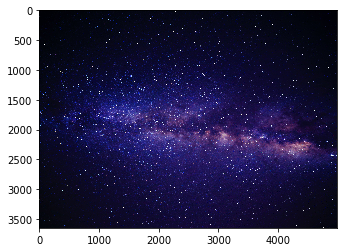

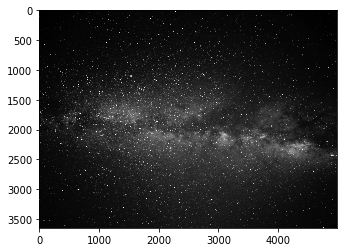

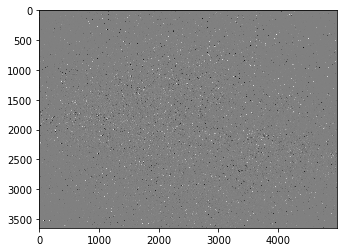

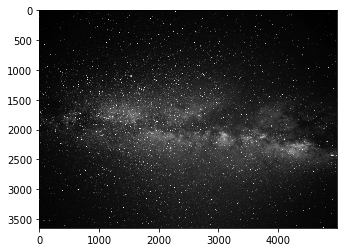

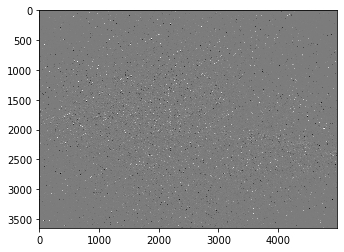

In [211]:
# Fetching the image from the URL
!curl -o image.jpg https://images.pexels.com/photos/110854/pexels-photo-110854.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500

#Reading the image and plotting it
img = mpimg.imread('image.jpg')
imgplot = plt.imshow(img)
plt.show()

# Converting to LAB Colour Scheme
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Splitting the image into the L, A and B components
L, A ,B = cv2.split(lab)

# Gaussian Blur Filter in the X direction to reduce noise
gaus_x = cv2.GaussianBlur(L, (5,5), sigmaX = 100)
imgplot = plt.imshow(gaus_x, cmap = 'gray')
plt.show()

# Derivatives in the X direction
sobelx = cv2.Sobel(gaus_x, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx, cmap = 'gray')
plt.show()

# Guassian Blur Filter in the Y direction to reduce noise
gaus_y = cv2.GaussianBlur(L, (5,5), sigmaX = 0, sigmaY = 100)
imgplot = plt.imshow(gaus_y, cmap = 'gray')
plt.show()

# Derivatives in the Y direction
sobely = cv2.Sobel(gaus_y, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobely, cmap = 'gray')
plt.show()

In the example below, as we selected a ROI which is not very clear, the back projection is not useful for feature detection and selection.

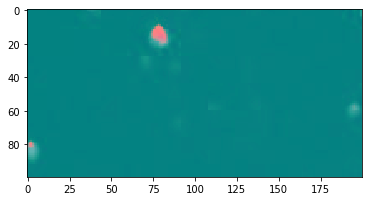

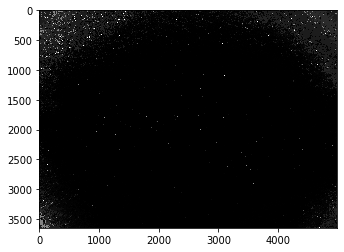

In [212]:
# Selecting a region of interest (ROI) to be back projected
roi = img[100:200, 500:700]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2LAB)
plt.imshow(roi)
plt.show()

# Computing the Back Projection of the ROI on the Image
mask = cv2.calcBackProject([lab], [1, 2], roi_hist, [0, 180, 0, 256], 1)
plt.imshow(mask, cmap = 'gray')
plt.show()

In this exapmle, as the image alreadt has a high contrast ratio, the histogram equivalence does not have any significant effect on the image.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  224k  100  224k    0     0   985k      0 --:--:-- --:--:-- --:--:--  981k


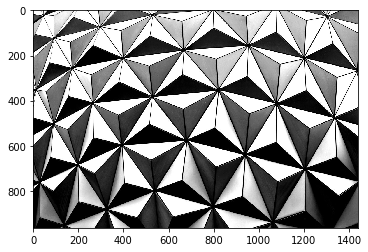

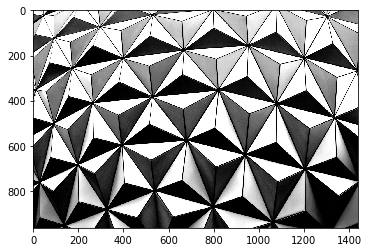

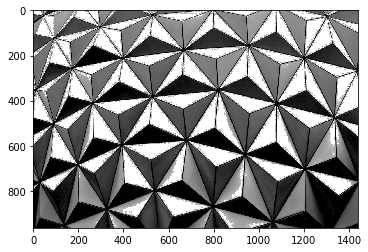

In [213]:
# Fetching the image from the URL
!curl -o image.jpg https://www.trombettatales.com/wp-content/uploads/2018/07/abstract-abstract-photo-art-1070345-1440x964.jpg

# Reading the image and plotting it
img = mpimg.imread('image.jpg')
imgplot = plt.imshow(img)
plt.show()

# Using the OpenCV library to convert the image into LAB color scheme
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Splitting the image into the L, A and B components
L, A ,B = cv2.split(lab)

# Performing Histogram Equalization
equ = cv2.equalizeHist(L)

# Image before Histogram Equalization
plt.imshow(L, cmap = 'gray')
plt.show()

# Image after Histogram Equalization
plt.imshow(equ, cmap = 'gray')
plt.show()

# Part 2 - PCA

a. Compute mean and principal components for a set of images. Display the mean image and the first 2 principal compoents.

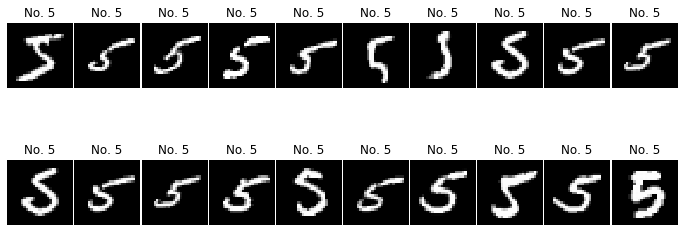

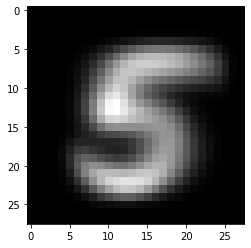

In [214]:
# Loading the MNIST dataset
(train_digits, train_labels), (test_digits, test_labels) = mnist.load_data()

# Filtering the dataset to select only the 5's
train_filter = np.where((train_labels == 5 ))
test_filter = np.where((test_labels == 5))
sample_digits, sample_labels = train_digits[train_filter], train_labels[train_filter]
original_dataset = sample_digits

# Code to view 20 images
num_rows, num_cols = 2, 10
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5), gridspec_kw={'wspace':0.03, 'hspace':0.01}, squeeze=True)
for r in range(num_rows):
  for c in range(num_cols):
    image_index = r * 7 + c
    ax[r,c].axis("off")
    ax[r,c].imshow(sample_digits[image_index], cmap='gray')
    ax[r,c].set_title('No. %d' % sample_labels[image_index])

plt.show()
# Computing the mean image from the training dataset
m = np.mean(sample_digits, axis=0)
plt.imshow(m, cmap= 'gray')

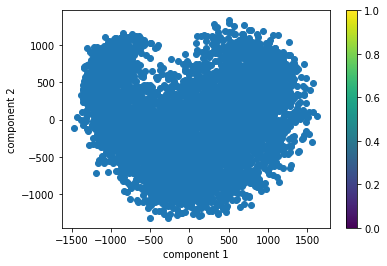

In [215]:
# Flatteing the dataset
nsamples, nx, ny = sample_digits.shape
d2_train_dataset = sample_digits.reshape((nsamples,nx*ny))

# Computing the principal components
pca = PCA(n_components = 2)
res = pca.fit_transform(d2_train_dataset)

# Plotting the first 2 principal components
plt.scatter(res[:, 0], res[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

b. Compute and display the reconstructions of a test image with the p principal components (p = 10 and p = 50)

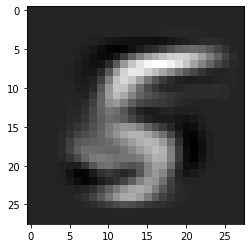

In [216]:
# Computing the principal components for n = 10
pca = PCA(n_components = 10, random_state = 0)
res = pca.fit_transform(d2_train_dataset)

# Project lower dimension data onto original features
approximation = pca.inverse_transform(res)

# Reshape approximation
approximation = approximation.reshape(-1,28,28)

# Plot the image with less features
plt.imshow(approximation[5], cmap = 'gray')
plt.show()

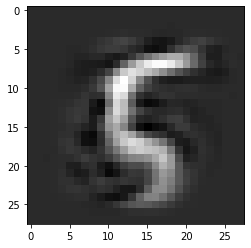

In [217]:
# Computing the principal components for n = 50
pca = PCA(n_components = 50, random_state = 0)
res = pca.fit_transform(d2_train_dataset)

# Project lower dimension data onto original features
approximation = pca.inverse_transform(res)

# Reshape approximation
approximation = approximation.reshape(-1,28,28)

# Plot the image with less features
plt.imshow(approximation[5], cmap = 'gray')
plt.show()

c. Computing and displaying Sum of Square Differences (SSD) and Distance from Feature Space (DFFS) heat maps

In [0]:
# Function for Sum of Square Differences (SSD)

# A and B are the 2 images
# M is the mean and inv_conv is the inverse covariance matrix
def ssd(A, B, M, inv_cov):
    h, w = A.shape
    result = np.zeros_like(A, dtype='float64')

    for i in range(h):
        for j in range(w):
            # array with particular pixels from each image
            v = np.array([A[i, j], B[i, j]])
            # calculate euclidean distance and insert value as a pixel
            result[i, j] = SSD.euclidean(v, M)
    return result

In [0]:
# Function for Distance from Feature Spaces (DFFS)

# A and B are the 2 images
# M is the mean and inv_conv is the inverse covariance matrix
def dffs(A, B, M, inv_cov):
    D = np.dstack([A, B]).reshape(-1, 2)
    result = SSD.cdist(D, M[None, :], metric='mahalanobis', VI=inv_cov)
    result = result.reshape(A.shape)
    return result

In [220]:
# Code to upload the composite image mnist.jpeg
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mnist.jpg to mnist (7).jpg
User uploaded file "mnist.jpg" with length 18290 bytes


In [0]:
# Read the composite image and define the StepSize and Window Size 

# Reading the composite image
image = cv2.imread("mnist.jpg") 
height, width =  tmp.shape[:2]

# Converting the composite image into Grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# resize image
image = cv2.resize(image, (280, 196))

# Specifying the step size and window size
stepSize = 28
(w_width, w_height) = (28, 28)

In [0]:
# Computing the SSD Heatmaps with all the digits present in the composite image

# Creating a temporary image for drawing rectangles
tmp = image 

height, width =  tmp.shape[:2]
for x in range(0, 196, stepSize):
   for y in range(0, 280, stepSize):
      try:
          window = image[x:x + w_width, y:y + w_height]
          t = window
          a = approximation[23]
          M = np.array([a.mean(), t.mean()])
          covariance = np.cov([a.ravel(), t.ravel()])
          inv_cov = np.linalg.inv(covariance)
          tmp[x:x + w_width, y:y + w_height] = ssd(a, t, M, inv_cov)
      except:
          print("")

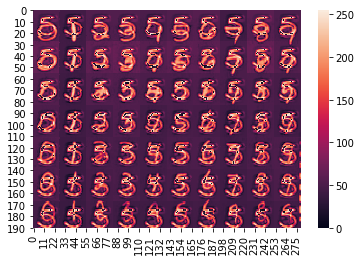

In [223]:
ax = sns.heatmap(tmp)

In [0]:
# Computing the DFFS Heatmaps with all the digits present in the composite image

# Creating a temporary image for drawing rectangles
tmp = image 

for x in range(0, 196, stepSize):
   for y in range(0, 280, stepSize):
      try:
          window = image[x:x + w_width, y:y + w_height]
          t = window
          a = approximation[1]
          M = np.array([a.mean(), t.mean()])
          covariance = np.cov([a.ravel(), t.ravel()])
          inv_cov = np.linalg.inv(covariance)
          tmp[x:x + w_width, y:y + w_height] =  dffs(a, t, M, inv_cov)
    
      except:
          print("")

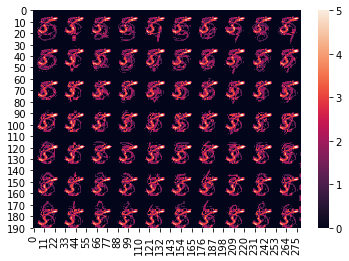

In [225]:
ax = sns.heatmap(tmp)

d. Evaluate the performance of SSD and DFFS

The SSD and DFFS are algorithms which work on the principle of the distances computed. While these methods are intuitive and give a good result in situations where the images are highly pre-processed and have fewer features.

When computing the heatmaps of the digit '7', we can see that the digit '1' and digits '7' heatmaps look similar, thus it will result in less accurate prediction. The case is similar to the digits 3 and 8, 0 and 6 and so on.

Classification using distance metrics has advantages such as - 

* No training time is taken.

* Ideal for low - dimensional feature spaces such as the MNIST dataset.

Classification using distance metrics has drawbacks such as - 

* The algorithm does not learn anything, so it will not improve in the future iterations, unlike deep learning approach.

* As the algorithms scales with the increase in data points, computation over large datasets will be slow.

* In a real-world handwritten number recognition, it will not give a good accuracy if the feature space is very large.



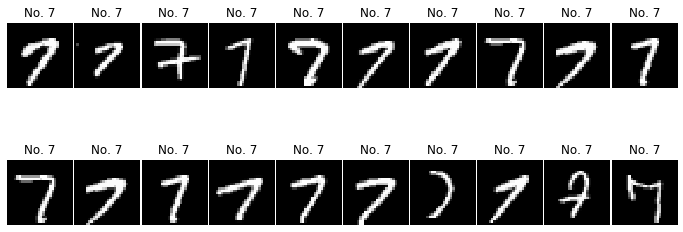

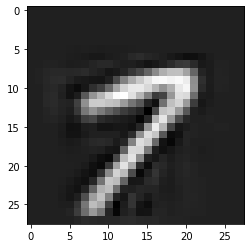

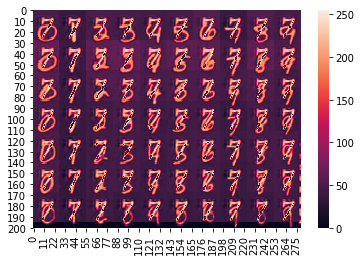

In [236]:
# Loading the MNIST dataset
(train_digits, train_labels), (test_digits, test_labels) = mnist.load_data()

# Filtering the dataset to select only the 7's
train_filter = np.where((train_labels == 7))
test_filter = np.where((test_labels == 7))
sample_digits, sample_labels = train_digits[train_filter], train_labels[train_filter]
original_dataset = sample_digits

# Code to view 20 images
num_rows, num_cols = 2, 10
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5), gridspec_kw={'wspace':0.03, 'hspace':0.01}, squeeze=True)
for r in range(num_rows):
  for c in range(num_cols):
    image_index = r * 7 + c
    ax[r,c].axis("off")
    ax[r,c].imshow(sample_digits[image_index], cmap='gray')
    ax[r,c].set_title('No. %d' % sample_labels[image_index])

plt.show()
# Computing the mean image from the training dataset
m = np.mean(sample_digits, axis = 0)
plt.imshow(m, cmap= 'gray')

# Flatteing the dataset
nsamples, nx, ny = sample_digits.shape
d2_train_dataset = sample_digits.reshape((nsamples,nx*ny))

# Computing the principal components for n = 50
pca = PCA(n_components = 50, random_state = 0)
res = pca.fit_transform(d2_train_dataset)

# Project lower dimension data onto original features
approximation = pca.inverse_transform(res)

# Reshape approximation
approximation = approximation.reshape(-1,28,28)

# Plot the image with less features
plt.imshow(approximation[5], cmap = 'gray')
plt.show()

# Read the composite image and define the StepSize and Window Size 

# Reading the composite image
image = cv2.imread("mnist.jpg") 

# Converting the composite image into Grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Creating a temporary image for drawing rectangles
tmp = image 

# Specifying the step size and window size
stepSize = 28
(w_width, w_height) = (28, 28)

# Computing the SSD Heatmaps with all the digits present in the composite image
for x in range(0, 196 , stepSize):
   for y in range(0, 280, stepSize):
      try:
          window = image[x:x + w_width, y:y + w_height]
          t = window
          a = approximation[23]
          M = np.array([a.mean(), t.mean()])
          covariance = np.cov([a.ravel(), t.ravel()])
          inv_cov = np.linalg.inv(covariance)
          tmp[x:x + w_width, y:y + w_height] = ssd(a, t, M, inv_cov)
      except:
          print("")

ax = sns.heatmap(tmp)

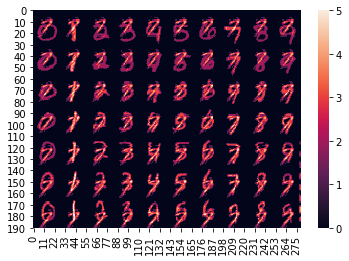

In [239]:
# Computing the DFFS Heatmaps with all the digits present in the composite image

# Creating a temporary image for drawing rectangles
tmp = image 

for x in range(0, 196, stepSize):
   for y in range(0, 280, stepSize):
      try:
          window = image[x:x + w_width, y:y + w_height]
          t = window
          a = approximation[1]
          M = np.array([a.mean(), t.mean()])
          covariance = np.cov([a.ravel(), t.ravel()])
          inv_cov = np.linalg.inv(covariance)
          tmp[x:x + w_width, y:y + w_height] =  dffs(a, t, M, inv_cov)
    
      except:
          print("")

x = sns.heatmap(tmp)